# Project 2: Kaggle Competition - Ames, Iowa Housing Prices

## NoteBook Contents
- Part 1 - Data Cleansing, EDA, and Pre-Proccessing
- Part 2 - Modeling, Testing, and Conclusion

----------------------------------------

### Part 2 - Modeling, Testing, and Conclusion

In [2]:
#libraries

import requests
import re
import sympy as sy
import statsmodels.api as sm
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import random as rand
import pandas as pd
import pandas_datareader as pdr
import plotly
import plotly.express as px
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import glob
import folium

from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans
from statsmodels.discrete.discrete_model import Logit
from scipy.stats import ttest_ind
from alpha_vantage.timeseries import TimeSeries
from random import sample
from pathlib import Path
from pandas import Series
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from ipywidgets import interact
from IPython.display import display
from category_encoders import OneHotEncoder as OHE
from bs4 import BeautifulSoup
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TweedieRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.dummy import DummyClassifier

pd.options.display.max_rows = None
pd.options.display.max_columns = None

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
#testing & model data import
df_test = pd.read_csv('../datasets/test.csv', skipinitialspace=True)
df_model = pd.read_csv('../final_colinmondi/train_clean_v2.csv', skipinitialspace=True)

In [4]:
#set X & y
X = df_model.drop('saleprice', axis = 1)
y = df_model['saleprice']

In [5]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

#### Model 1 - simple linear regression

In [6]:
#initiate & fit
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
#pull scores
lr.score(X_train, y_train)

0.9334014260728074

In [8]:
lr.score(X_test, y_test)

-2.198455845029543e+17

In [9]:
#confirm R2
y_preds = lr.predict(X_test)
r2_score(y_test, y_preds)

-2.198455845029543e+17

In [10]:
#RMSE
mean_squared_error(y_test,y_preds,squared=False)

31055239949374.926

For the testing data, R2 is a significantly worse in comparison to our training data. In addition to that, there's very high RSME value (also bad).

Before we continue testing models, lets apply all the modifications made in the training data (from Part 1) to the test data as well where applicable.

In [11]:
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')
#################
df_test = df_test.drop(columns = ['pid', 'alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature'], axis = 1)
#################
df_test['bsmtfin_sf_1'] = df_test['bsmtfin_sf_1'].fillna(df_test.groupby('neighborhood')['bsmtfin_sf_1'] \
                                                           .transform('mean'))
df_test['bsmtfin_sf_2'] = df_test['bsmtfin_sf_2'].fillna(df_test.groupby('neighborhood')['bsmtfin_sf_2'] \
                                                           .transform('mean'))
df_test['bsmt_unf_sf'] = df_test['bsmt_unf_sf'].fillna(df_test.groupby('neighborhood')['bsmt_unf_sf'] \
                                                         .transform('mean'))
df_test['garage_area'] = df_test['garage_area'].fillna(df_test.groupby('neighborhood')['garage_area'] \
                                                         .transform('mean'))
df_test['bsmt_full_bath'] = df_test['bsmt_full_bath'].fillna(df_test.groupby('neighborhood') \
                                                               ['bsmt_full_bath'].transform('mean'))
df_test['bsmt_half_bath'] = df_test['bsmt_half_bath'].fillna(df_test.groupby('neighborhood') \
                                                               ['bsmt_half_bath'].transform('mean'))
df_test['total_bsmt_sf'] = df_test['total_bsmt_sf'].fillna(df_test.groupby('neighborhood') \
                                                             ['total_bsmt_sf'].transform('mean'))
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].fillna(df_test.groupby('neighborhood') \
                                                             ['garage_yr_blt'].transform('mean'))
df_test['lot_frontage'] = df_test['lot_frontage'].fillna(0)
df_test['mas_vnr_area'] = df_test['mas_vnr_area'].fillna(0)
df_test['garage_cars'] = df_test['garage_cars'].fillna(0)
df_test['garage_area'] = df_test['garage_area'].fillna(0)
df_test['mas_vnr_type'] = df_test['mas_vnr_type'].fillna('None')
df_test['bsmt_qual'] = df_test['bsmt_qual'].fillna('TA')
df_test['bsmt_cond'] = df_test['bsmt_cond'].fillna('TA')
df_test['bsmt_exposure'] = df_test['bsmt_exposure'].fillna('No')
df_test['bsmtfin_type_1'] = df_test['bsmtfin_type_1'].fillna('GLQ')
df_test['bsmtfin_type_2'] = df_test['bsmtfin_type_2'].fillna('Unf')
df_test['garage_finish'] = df_test['garage_cars'].fillna('Unf')
df_test['garage_qual'] = df_test['garage_qual'].fillna('TA')
df_test['garage_cond'] = df_test['garage_cond'].fillna('TA')
df_test['garage_type'] = df_test['garage_type'].fillna('Attchd')
#################
df_test['lot_shape'] = [0 if df_test['lot_shape'][i] == 'IR3' else 1 if df_test['lot_shape'][i] == 'IR2'
                        else 2 if df_test['lot_shape'][i] == 'IR1' else 3 for i in df_test.index]

df_test['utilities'] = [0 if df_test['utilities'][i] == 'ELO' else 1 if df_test['utilities'][i] == 'NoSeWa'
                        else 2 if df_test['utilities'][i] == 'NoSewr' else 3 for i in df_test.index]

df_test['land_slope'] = [0 if df_test['land_slope'][i] == 'Sev' else 1 if df_test['land_slope'][i] == 'Mod'
                        else 2 for i in df_test.index]

df_test['exter_qual'] = [0 if df_test['exter_qual'][i] == 'Po' else 1 if df_test['exter_qual'][i] == 'Fa'
                        else 2 if df_test['exter_qual'][i] == 'TA' else 3 if df_test['exter_qual'][i] == 'Gd'
                        else 4 for i in df_test.index]

df_test['exter_cond'] = [0 if df_test['exter_cond'][i] == 'Po' else 1 if df_test['exter_cond'][i] == 'Fa'
                        else 2 if df_test['exter_qual'][i] == 'TA' else 3 if df_test['exter_cond'][i] == 'Gd'
                        else 4 for i in df_test.index]

df_test['bsmt_qual'] = [0 if df_test['bsmt_qual'][i] == np.nan else 1 if df_test['bsmt_qual'][i] == 'Po'
                        else 2 if df_test['exter_cond'][i] == 'Fa' else 3 if df_test['exter_cond'][i] == 'TA'
                        else 4 if df_test['exter_cond'][i] == 'Gd' else 5 for i in df_test.index]

df_test['bsmt_cond'] = [0 if df_test['bsmt_cond'][i] == np.nan else 1 if df_test['bsmt_cond'][i] == 'Po'
                        else 2 if df_test['bsmt_cond'][i] == 'Fa' else 3 if df_test['bsmt_cond'][i] == 'TA'
                        else 4 if df_test['bsmt_cond'][i] == 'Gd' else 5 for i in df_test.index]

df_test['bsmt_exposure'] = [0 if df_test['bsmt_exposure'][i] == np.nan else 1 if df_test['bsmt_exposure']
                            [i] == 'No' else 2 if df_test['bsmt_exposure'][i] == 'Mn' else 3 if df_test
                            ['bsmt_exposure'][i] == 'Av' else 4 for i in df_test.index]

df_test['bsmtfin_type_1'] = [0 if df_test['bsmtfin_type_1'][i] == np.nan else 1 if df_test
                             ['bsmtfin_type_1'][i] == 'Unf' else 2 if df_test['bsmtfin_type_1']
                             [i] == 'LwQ' else 3 if df_test['bsmtfin_type_1'][i] == 'Rec' else 
                             4 if df_test['bsmtfin_type_1'][i] == 'BLQ' else 5 if df_test
                             ['bsmtfin_type_1'][i] == 'ALQ' else 6 for i in df_test.index]

df_test['bsmtfin_type_2'] = [0 if df_test['bsmtfin_type_2'][i] == np.nan else 1 if df_test
                             ['bsmtfin_type_2'][i] == 'Unf' else 2 if df_test['bsmtfin_type_2']
                             [i] == 'LwQ' else 3 if df_test['bsmtfin_type_2'][i] == 'Rec' else 4 
                             if df_test['bsmtfin_type_2'][i] == 'BLQ' else 5 if df_test
                             ['bsmtfin_type_2'][i] == 'ALQ' else 6 for i in df_test.index]

df_test['heating_qc'] = [0 if df_test['heating_qc'][i] == 'Po' else 1 if df_test['heating_qc'][i] == 'Fa'
                        else 2 if df_test['heating_qc'][i] == 'TA' else 3 if df_test['heating_qc'][i] == 'Gd'
                        else 4 for i in df_test.index]

df_test['electrical'] = [0 if df_test['electrical'][i] == 'Mix' else 1 if df_test['electrical'][i] == 'FuseP'
                        else 2 if df_test['electrical'][i] == 'FuseF' else 3 if df_test['electrical']
                         [i] == 'FuseA' else 4 for i in df_test.index]

df_test['kitchen_qual'] = [0 if df_test['kitchen_qual'][i] == 'Po' else 1 if df_test['kitchen_qual'][i] == 'Fa'
                          else 2 if df_test['kitchen_qual'][i] == 'TA' else 3 if df_test['kitchen_qual'][i] == 'Gd'
                          else 4 for i in df_test.index]

df_test['functional'] = [0 if df_test['functional'][i] == 'Sal' else 1 if df_test['functional'][i] == 'Sev'
                        else 2 if df_test['functional'][i] == 'Maj2' else 3 if df_test['functional'][i] == 'Maj1'
                        else 4 if df_test['functional'][i] == 'Mod' else 5 if df_test['functional'][i] == 'Min2'
                        else 6 if df_test['functional'][i] == 'Min1' else 7 for i in df_test.index]

df_test['garage_finish'] =  [0 if df_test['garage_finish'][i] == np.nan else 1 if df_test
                             ['garage_finish'][i] == 'Unf' else 2 if df_test['garage_finish'][i]
                             == 'RFn' else 3 for i in df_test.index]

df_test['garage_qual'] = [0 if df_test['garage_qual'][i] == np.nan else 1 if df_test['garage_qual'][i] == 'Po'
                         else 2 if df_test['garage_qual'][i] == 'Fa' else 3 if df_test['garage_qual'][i] == 'TA'
                         else 4 if df_test['garage_qual'][i] == 'Gd' else 5 for i in df_test.index]

df_test['garage_cond'] = [0 if df_test['garage_cond'][i] == np.nan else 1 if df_test['garage_cond'][i] == 'Po'
                            else 2 if df_test['garage_cond'][i] == 'Fa' else 3 if df_test['garage_cond'][i] == 'TA'
                            else 4 if df_test['garage_cond'][i] == 'Gd' else 5 for i in df_test.index]

df_test['paved_drive'] = [0 if df_test['paved_drive'][i] == 'N' else 1 if df_test['paved_drive'][i] == 'P'
                            else 2 for i in df_test.index]
#################
df_test['lot_size_class'] = [1 if i > 20000 else 0 for i in df_test['lot_area']]
#################
df_test['age_class'] = ['Old1' if df_test['year_built'][i] <= 1890 else 'Old2' if df_test['year_built'][i] 
                        <= 1893 else 'Old3' if df_test['year_built'][i] <= 1935 else 'Old4' if 
                        df_test['year_built'][i] < 1981 else 'Old5' for i in df_test.index]
#################
df_test['build_remodel'] = df_test['year_remod/add'] - df_test['year_built']
#################
features = ['overall_qual'
            ,'exter_qual'
            ,'gr_liv_area'
            ,'1st_flr_sf'
            ,'kitchen_qual'
            ,'year_built'
            ,'garage_area'
            ,'year_remod/add'
            ,'full_bath'
            ,'bsmtfin_sf_1'
            ,'mas_vnr_area'
            ,'fireplaces'
            ,'heating_qc'
            ,'lot_area'
            ,'wood_deck_sf'
            ,'open_porch_sf'
            ,'bsmtfin_sf_2'
            ,'bsmt_unf_sf'
            ,'2nd_flr_sf'
            ,'lot_frontage'
            ,'overall_cond'
            ,'low_qual_fin_sf'
            ,'bsmt_full_bath'
            ,'bsmt_half_bath'
            ,'half_bath'
            ,'bedroom_abvgr'
            ,'kitchen_abvgr'
            ,'enclosed_porch'
            ,'3ssn_porch'
            ,'screen_porch'
            ,'pool_area'
            ,'misc_val'
            ,'mo_sold'
            ,'yr_sold'
            ,'lot_shape'
            ,'utilities'
            ,'land_slope'
            ,'exter_cond'
            ,'bsmt_qual'
            ,'bsmt_cond'
            ,'bsmt_exposure'
            ,'bsmtfin_type_1'
            ,'bsmtfin_type_2'
            ,'electrical'
            ,'functional'
            ,'garage_finish'
            ,'garage_qual'
            ,'garage_cond'
            ,'paved_drive'
            ,'build_remodel']

X = df_test[features]
#################
sc = StandardScaler()
Z = sc.fit_transform(X)
Z = pd.DataFrame(Z, columns = X.columns)
#################
features_c = [i for i in df_test.columns if df_test[i].dtype == 'object']

Z['lot_size_class'] = df_test['lot_size_class']
Z['saleprice'] = 0

X = df_test[features_c]
X['ms_subclass'] = df_test['ms_subclass'].astype(str)

X_dummies = pd.get_dummies(data = X, drop_first = True)
joined_df = Z.join(X)
#################
#make sure dataframes have equal number of columns
final_train, final_test = df_model.align(joined_df, join = 'inner', axis = 1)
#################
#add back in blank 'id' column in test DataFrame
final_test.insert(0, 'id',df_test['id'])
#################
final_train.to_csv('../final_colinmondi/final_train.csv', index = False)
final_test.to_csv('../final_colinmondi/final_test.csv', index = False)

<ipython-input-11-1981dd7bdc9a>:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ms_subclass'] = df_test['ms_subclass'].astype(str)


In [12]:
#reset X, y, & train_test_split
X = final_train.drop('saleprice', axis = 1)
y = final_train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [13]:
#re-do linear regression model

#initiate & fit
lr_new = LinearRegression()
lr_new.fit(X_train, y_train)

LinearRegression()

In [14]:
#pull scores
lr_new.score(X_train, y_train)

0.8918351671899469

In [15]:
lr_new.score(X_test, y_test)

0.8905962021622964

In [16]:
#confirm R2
y_preds = lr_new.predict(X_test)
r2_score(y_test, y_preds)

0.8905962021622964

In [17]:
#RMSE
mean_squared_error(y_test,y_preds,squared=False)

21907.469444565326

Looks much better now regarding R2 & RMSE.

--------------------------------

#### Model 2 - ridge

In [18]:
#initiate & fit
ridge = RidgeCV(alphas = np.logspace(0, 10, 100), cv = None)
ridge.fit(X_train, y_train)

#np.logspace(0, 10, 100) applied to model below; generates 100 alpha values from 0 and 10, equally distriubuted

RidgeCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.32194115e+0...
       4.75081016e+07, 5.99484250e+07, 7.56463328e+07, 9.54548457e+07,
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]))

In [19]:
#pull alpha & scores
ridge.alpha_

16.297508346206442

In [20]:
ridge.score(X_train, y_train)

0.891484603244676

In [21]:
ridge.score(X_test, y_test)

0.8913272457849526

In [22]:
#confirm R2
y_preds = ridge.predict(X_test)
r2_score(y_test, y_preds)

0.8913272457849526

In [23]:
#RMSE
mean_squared_error(y_test,y_preds,squared=False)

21834.153162309947

R2 and RMSE are slightly better when comparing the ridge versus linear regression model.

--------------------------------

#### Model 3 - lasso

In [24]:
#initiate & fit
lasso = LassoCV(alphas = np.logspace(0, 10, 100), cv = None, max_iter = 4000)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.32194115e+0...
       4.75081016e+07, 5.99484250e+07, 7.56463328e+07, 9.54548457e+07,
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
        max_iter=4000)

In [25]:
#pull alpha & scores
lasso.alpha_

132.19411484660287

In [26]:
lasso.score(X_train, y_train)

0.8912568127438738

In [27]:
lasso.score(X_test, y_test)

0.892381891022345

In [28]:
#confirm R2
y_preds = lasso.predict(X_test)
r2_score(y_test, y_preds)

0.892381891022345

In [29]:
#RMSE
mean_squared_error(y_test,y_preds,squared=False)

21727.94702419875

The R2 and RMSE for both lasso and ridge are very similar, too small of a differences in scores to make any conclusions.

--------------------------------

#### Model 4 - elestic net

In [30]:
#initiate & fit
elas = ElasticNetCV(alphas = np.logspace(0, 10, 100), l1_ratio = 0.5, cv = None)
elas.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.321941...
       4.75081016e+07, 5.99484250e+07, 7.56463328e+07, 9.54548457e+07,
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]))

In [31]:
#pull alpha & scores
elas.alpha_

1.0

In [32]:
elas.score(X_train, y_train)

0.8770335007266388

In [33]:
elas.score(X_test, y_test)

0.8789449489589242

In [34]:
#confirm R2
y_preds = elas.predict(X_test)
r2_score(y_test, y_preds)

0.8789449489589242

In [35]:
#RMSE
mean_squared_error(y_test,y_preds,squared=False)

23044.50973352861

The R2 and RMSE for elastic net are a tad bit worse in comparison to lasso & ridge.

--------------------------------

#### Model Choice

First I ruled out linear regression & elastic net due to the the fact that the R2 & RSME scores were worse in comparison to lasso & ridge. 

I decided to use the ridge model generated above because it will perform better when a prediction is the outcome of many variables (in comparison to lasso).

Source:http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/153-penalized-regression-essentials-ridge-lasso-elastic-net/#:~:text=Generally%2C%20lasso%20might%20perform%20better,2014).

(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

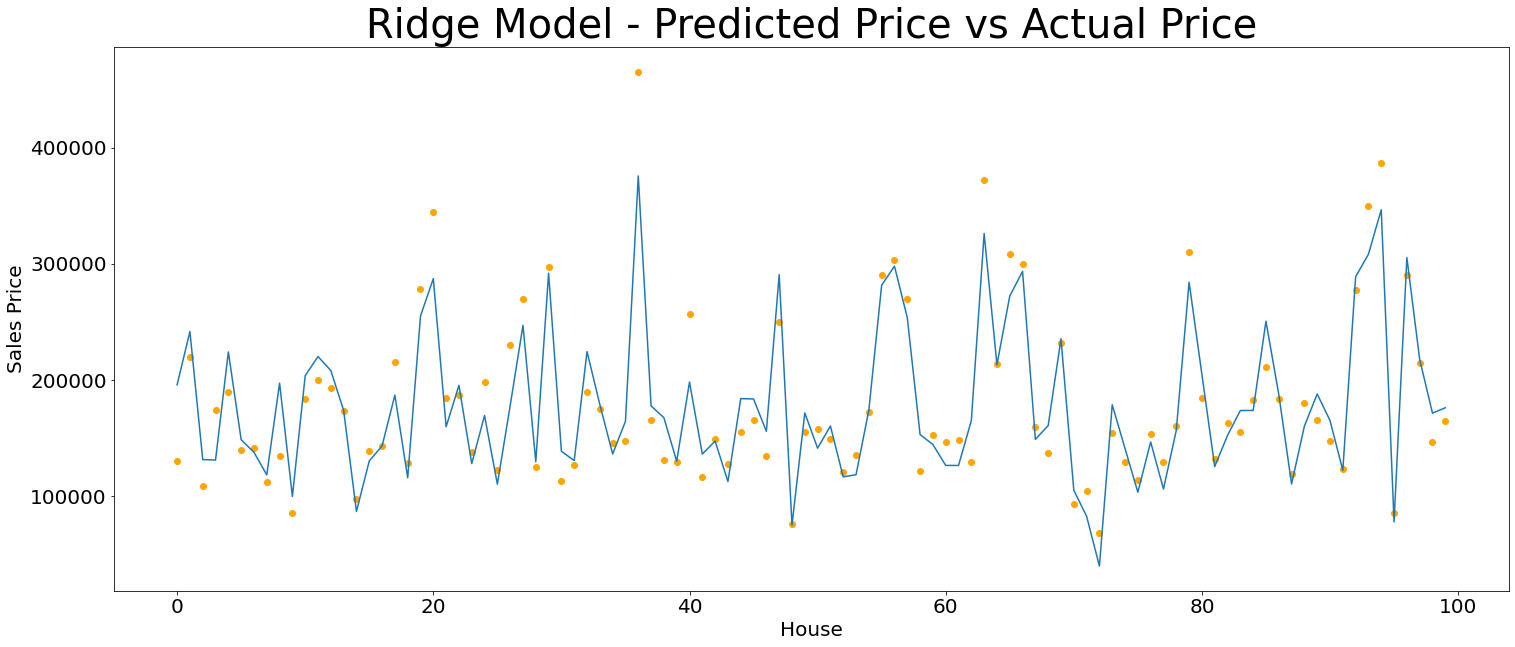

In [36]:
#created plot to display the difference of the predicted value versus actual value for a given houses price
#source: https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot

var_preds = ridge.predict(X)
plt.figure(figsize = (25, 10))
plt.plot(X.index[0:100], var_preds[0:100], label = 'Predicted')
plt.scatter(X.index[0:100], y[0:100], color = 'orange', label = 'Actual')
plt.ylabel('Sales Price',fontsize = 20)
plt.xlabel('House',fontsize = 20)
plt.title('Ridge Model - Predicted Price vs Actual Price', fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [37]:
#generate predictions on test data
final_test.drop(columns = ['saleprice', 'id'], axis = 1, inplace = True)
final_test['SalePrice'] = ridge.predict(final_test)
final_test.head(5)

,overall_qual,exter_qual,gr_liv_area,1st_flr_sf,kitchen_qual,year_built,garage_area,year_remod/add,full_bath,bsmtfin_sf_1,mas_vnr_area,fireplaces,heating_qc,lot_area,wood_deck_sf,open_porch_sf,bsmtfin_sf_2,bsmt_unf_sf,2nd_flr_sf,lot_frontage,overall_cond,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,half_bath,bedroom_abvgr,kitchen_abvgr,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,lot_shape,utilities,land_slope,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,electrical,functional,garage_finish,garage_qual,garage_cond,paved_drive,build_remodel,lot_size_class,SalePrice
0,-0.036625,-0.678056,0.851644,-0.634014,-2.280707,-1.991272,-0.142805,-1.683931,0.823523,-1.007121,-0.567521,-0.924179,-0.135191,-0.116539,-0.771435,0.189742,-0.301889,1.128982,1.551978,0.354090,2.157251,-0.083828,-0.830056,-0.24312,-0.788376,1.349887,4.253806,1.201172,-0.104133,-0.279956,-0.063043,-0.088203,-0.834055,-1.375733,0.686597,0.033768,0.216642,-5.439648,0.033768,0.02387,-0.634666,-1.312056,-0.32094,-8.232700,0.250709,0.0,-7.595978,-7.718947,0.322506,1.038392,0,149476.167529
1,-0.767467,-0.678056,0.928691,2.189607,-0.755604,0.214229,0.515669,-0.362932,0.823523,-1.007121,-0.567521,-0.924179,-1.194990,-0.064523,0.632217,-0.690771,-0.301889,3.352355,-0.805101,-1.660510,-1.388030,-0.083828,-0.830056,-0.24312,-0.788376,3.758832,4.253806,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,0.680527,-1.375733,-1.040716,0.033768,0.216642,0.309964,0.033768,0.02387,-0.634666,-1.312056,-0.32094,0.261202,0.250709,0.0,0.186132,0.152407,0.322506,-0.554598,0,151575.489336
2,0.694217,1.109731,-0.001807,-1.284593,0.769500,1.168849,-0.208652,1.055919,0.823523,0.257120,-0.567521,0.570166,0.924608,0.679902,0.054243,-0.338566,-0.301889,-1.031000,1.117536,0.032922,-0.501710,-0.083828,1.057998,-0.24312,1.189322,0.145415,-0.213708,-0.328721,-0.104133,-0.279956,-0.063043,-0.088203,1.059172,-1.375733,-1.040716,0.033768,0.216642,0.309964,0.033768,3.51692,1.300184,1.135851,-0.32094,0.261202,0.250709,0.0,0.186132,0.152407,0.322506,-0.554598,0,217841.470129
3,-0.767467,1.109731,-1.044913,-0.474035,-0.755604,-1.563339,0.045330,1.055919,-0.966213,-1.007121,-0.567521,-0.924179,-1.194990,-0.178757,-0.771435,-0.690771,-0.301889,1.006896,-0.805101,0.091316,0.384611,-0.083828,-0.830056,-0.24312,-0.788376,-1.059058,-0.213708,2.184675,-0.104133,-0.279956,-0.063043,-0.088203,0.301881,-0.622212,0.686597,0.033768,0.216642,0.309964,0.033768,0.02387,-0.634666,-1.312056,-0.32094,0.261202,0.250709,0.0,-3.704923,0.152407,-3.378933,2.750856,0,125194.773698
4,-0.036625,-0.678056,-0.203316,0.661812,-0.755604,-0.246622,0.205245,-1.047895,-0.966213,0.382631,0.753476,2.064511,-0.135191,-0.080728,-0.771435,0.424545,-0.301889,0.577248,-0.805101,-1.660510,-0.501710,-0.083828,1.057998,-0.24312,1.189322,0.145415,-0.213708,-0.328721,-0.104133,3.212349,-0.063043,-0.088203,0.301881,0.884829,-1.040716,0.033768,0.216642,0.309964,0.033768,0.02387,-0.634666,0.156688,-0.32094,0.261202,0.250709,0.0,0.186132,0.152407,0.322506,-0.554598,0,169296.292315


In [38]:
#format needed for submissions
final_test['Id'] = df_test['id']
submission = final_test[['Id', 'SalePrice']].copy()
submission.head(5)

,Id,SalePrice
0,2658,149476.167529
1,2718,151575.489336
2,2414,217841.470129
3,1989,125194.773698
4,625,169296.292315


In [39]:
#saved prediction results as CSV file
submission.to_csv('../final_colinmondi/submission_ridge.csv', index = False)

---------------------------------------------

#### GridSearch

Utilized GridSearch to view how each individual variable was performing for our Ridge model

In [40]:
final_train_cm = pd.read_csv('../final_colinmondi/final_train.csv', skipinitialspace=True)
final_test_cm = pd.read_csv('../final_colinmondi/final_test.csv', skipinitialspace=True)

In [41]:
#apply stats model add_constant function
X_cm = final_train_cm.drop('saleprice', axis = 1)
X_cm = sm.add_constant(X_cm)
y_cm = final_train_cm['saleprice']

#summrize via OLS
ols = sm.OLS(y_cm, X_cm).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     331.5
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:31:22   Log-Likelihood:                -22159.
No. Observations:                1933   AIC:                         4.441e+04
Df Residuals:                    1885   BIC:                         4.468e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.766e+05    534.979    330.190      0.000    1.76e+05    1.78e+05
overall_qual     1.501e+04   1033.167     14.524      0.000     1.3e+04     1.7e+04
exter_qual       7612.9788    953.506      7.984      0.000    5742.941    9483.017
gr_liv_area      1.517e+04    712.236     21.292      0.000    1.38e+04    1.66e+04
1st_flr_sf       9154.6053    846.887     10.810      0.000    7493.671    1.08e+04
kitchen_qual     5919.6368    873.207      6.779      0.000    4207.082    7632.192
year_built       3765.1526    608.223      6.190      0.000    2572.292    4958.013
garage_area      4527.3883    732.298      6.182      0.000    3091.189    5963.587
year_remod/add   3462.0369    666.057      5.198      0.000    2155.751    4768.323
full_bath        -198.2976    874.975     -0.227      0.821   -1914.318    1517.723
bsmtfin_sf_1     1.233e+04   1259.068      9.793      0.000    9860.483    1.48e+04
mas_vnr_area     3289.9428    609.406      5.399      0.000    2094.762    4485.124
fireplaces       2183.6932    660.072      3.308      0.001     889.145    3478.242
heating_qc       1665.4170    697.687      2.387      0.017     297.096    3033.738
lot_area         7947.6620    750.525     10.589      0.000    6475.714    9419.610
wood_deck_sf      785.9499    596.175      1.318      0.188    -383.282    1955.182
open_porch_sf     660.6910    586.671      1.126      0.260    -489.901    1811.283
bsmtfin_sf_2     2518.8672    959.352      2.626      0.009     637.364    4400.370
bsmt_unf_sf      5457.3759   1205.387      4.527      0.000    3093.342    7821.410
2nd_flr_sf       8590.7584    673.654     12.752      0.000    7269.572    9911.945
lot_frontage     2663.3770    598.713      4.449      0.000    1489.168    3837.586
overall_cond     3153.5054    701.025      4.498      0.000    1778.639    4528.372
low_qual_fin_sf   153.6196    543.489      0.283      0.777    -912.284    1219.523
bsmt_full_bath    747.9005    796.710      0.939      0.348    -814.627    2310.428
bsmt_half_bath   -727.9250    581.417     -1.252      0.211   -1868.214     412.364
half_bath        -305.5614    819.396     -0.373      0.709   -1912.580    1301.457
bedroom_abvgr   -3694.9201    758.243     -4.873      0.000   -5182.004   -2207.836
kitchen_abvgr   -2278.7369    621.200     -3.668      0.000   -3497.048   -1060.426
enclosed_porch    -50.5929    595.637     -0.085      0.932   -1218.770    1117.584
3ssn_porch        341.6012    540.610      0.632      0.528    -718.656    1401.859
screen_porch     1463.7917    562.560      2.602      0.009     360.485    2567.098
pool_area        -300.7403    549.978     -0.547      0.585   -1379.371     777.890
misc_val         -434.7076    541.539     -0.803      0.422   -1496.786     627.371
mo_sold           867.3729    543.781      1.595      0.111

In [42]:
#summrize via OLS
ols = sm.OLS(y_cm, X_cm).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     331.5
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:31:22   Log-Likelihood:                -22159.
No. Observations:                1933   AIC:                         4.441e+04
Df Residuals:                    1885   BIC:                         4.468e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.766e+05    534.979    330.190      0.000    1.76e+05    1.78e+05
overall_qual     1.501e+04   1033.167     14.524      0.000     1.3e+04     1.7e+04
exter_qual       7612.9788    953.506      7.984      0.000    5742.941    9483.017
gr_liv_area      1.517e+04    712.236     21.292      0.000    1.38e+04    1.66e+04
1st_flr_sf       9154.6053    846.887     10.810      0.000    7493.671    1.08e+04
kitchen_qual     5919.6368    873.207      6.779      0.000    4207.082    7632.192
year_built       3765.1526    608.223      6.190      0.000    2572.292    4958.013
garage_area      4527.3883    732.298      6.182      0.000    3091.189    5963.587
year_remod/add   3462.0369    666.057      5.198      0.000    2155.751    4768.323
full_bath        -198.2976    874.975     -0.227      0.821   -1914.318    1517.723
bsmtfin_sf_1     1.233e+04   1259.068      9.793      0.000    9860.483    1.48e+04
mas_vnr_area     3289.9428    609.406      5.399      0.000    2094.762    4485.124
fireplaces       2183.6932    660.072      3.308      0.001     889.145    3478.242
heating_qc       1665.4170    697.687      2.387      0.017     297.096    3033.738
lot_area         7947.6620    750.525     10.589      0.000    6475.714    9419.610
wood_deck_sf      785.9499    596.175      1.318      0.188    -383.282    1955.182
open_porch_sf     660.6910    586.671      1.126      0.260    -489.901    1811.283
bsmtfin_sf_2     2518.8672    959.352      2.626      0.009     637.364    4400.370
bsmt_unf_sf      5457.3759   1205.387      4.527      0.000    3093.342    7821.410
2nd_flr_sf       8590.7584    673.654     12.752      0.000    7269.572    9911.945
lot_frontage     2663.3770    598.713      4.449      0.000    1489.168    3837.586
overall_cond     3153.5054    701.025      4.498      0.000    1778.639    4528.372
low_qual_fin_sf   153.6196    543.489      0.283      0.777    -912.284    1219.523
bsmt_full_bath    747.9005    796.710      0.939      0.348    -814.627    2310.428
bsmt_half_bath   -727.9250    581.417     -1.252      0.211   -1868.214     412.364
half_bath        -305.5614    819.396     -0.373      0.709   -1912.580    1301.457
bedroom_abvgr   -3694.9201    758.243     -4.873      0.000   -5182.004   -2207.836
kitchen_abvgr   -2278.7369    621.200     -3.668      0.000   -3497.048   -1060.426
enclosed_porch    -50.5929    595.637     -0.085      0.932   -1218.770    1117.584
3ssn_porch        341.6012    540.610      0.632      0.528    -718.656    1401.859
screen_porch     1463.7917    562.560      2.602      0.009     360.485    2567.098
pool_area        -300.7403    549.978     -0.547      0.585   -1379.371     777.890
misc_val         -434.7076    541.539     -0.803      0.422   -1496.786     627.371
mo_sold           867.3729    543.781      1.595      0.111

In [43]:
X_model = final_train_cm .drop('saleprice', axis = 1)
y_model = final_train_cm['saleprice']

In [44]:
#set paramaters
ridge_params = {
    'alpha': np.logspace(-5,5,20)
}

In [45]:
#define & fit ridge via GridSearchCV
ridge_gridsearch = GridSearchCV(estimator = Ridge(),
                                param_grid = ridge_params,
                                verbose = 1,
                                cv = None,
                                n_jobs = -1)

In [46]:
ridge_gridsearch.fit(X_model, y_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             verbose=1)

In [47]:
#identify best alpha
ridge_gridsearch.best_params_

{'alpha': 6.1584821106602545}

In [48]:
#identify best score
ridge_gridsearch.best_score_

0.8850467469307428

In [49]:
#identify best estimator
ridge_gridsearch.best_estimator_

Ridge(alpha=6.1584821106602545)

In [50]:
ridge_gridsearch.cv_results_

{'mean_fit_time': array([0.0093473 , 0.00871096, 0.0051959 , 0.00511665, 0.00485401,
        0.00420446, 0.00523143, 0.00531363, 0.00483508, 0.00387502,
        0.00400505, 0.00464253, 0.00552025, 0.0052135 , 0.00457644,
        0.00474739, 0.00491123, 0.0035419 , 0.00334024, 0.00327845]),
 'std_fit_time': array([1.39946166e-03, 6.21037694e-04, 5.01133563e-04, 5.64195035e-04,
        4.79255466e-04, 2.35209681e-04, 9.15218160e-04, 4.36687902e-04,
        6.53604476e-04, 5.53841381e-04, 7.77165558e-04, 8.52710005e-04,
        6.09153574e-04, 7.14749523e-04, 7.42520543e-04, 1.23156432e-04,
        6.78405467e-04, 2.07607824e-04, 9.40716450e-05, 9.89711563e-05]),
 'mean_score_time': array([0.00352755, 0.00440111, 0.00352039, 0.00287414, 0.00267982,
        0.00255775, 0.00359468, 0.00324707, 0.00263915, 0.00260038,
        0.00242634, 0.00311928, 0.00289021, 0.00287237, 0.00274639,
        0.00266004, 0.0025897 , 0.00202694, 0.00196147, 0.00190034]),
 'std_score_time': array([5.85583960e-

In [51]:
pd.DataFrame(ridge_gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009347,0.001399,0.003528,0.000586,1e-05,{'alpha': 1e-05},0.861289,0.887783,0.890652,0.901588,0.883778,0.885018,0.013256,12
1,0.008711,0.000621,0.004401,0.001225,3.35982e-05,{'alpha': 3.359818286283781e-05},0.861289,0.887783,0.890652,0.901588,0.883778,0.885018,0.013256,11
2,0.005196,0.000501,0.003520,0.000422,0.000112884,{'alpha': 0.00011288378916846884},0.861289,0.887783,0.890652,0.901588,0.883778,0.885018,0.013256,10
3,0.005117,0.000564,0.002874,0.000524,0.000379269,{'alpha': 0.000379269019073225},0.861289,0.887783,0.890653,0.901588,0.883778,0.885018,0.013256,9
4,0.004854,0.000479,0.002680,0.000276,0.00127427,{'alpha': 0.0012742749857031334},0.861289,0.887783,0.890653,0.901588,0.883778,0.885018,0.013256,8
5,0.004204,0.000235,0.002558,0.000306,0.00428133,{'alpha': 0.004281332398719391},0.861288,0.887783,0.890653,0.901588,0.883778,0.885018,0.013256,7
6,0.005231,0.000915,0.003595,0.000555,0.0143845,{'alpha': 0.01438449888287663},0.861287,0.887784,0.890655,0.901587,0.883778,0.885018,0.013256,6
7,0.005314,0.000437,0.003247,0.000484,0.0483293,{'alpha': 0.04832930238571752},0.861283,0.887785,0.890662,0.901586,0.883780,0.885019,0.013258,5
8,0.004835,0.000654,0.002639,0.000257,0.162378,{'alpha': 0.1623776739188721},0.861269,0.887789,0.890685,0.901580,0.883784,0.885021,0.013264,4
9,0.003875,0.000554,0.002600,0.000393,0.545559,{'alpha': 0.5455594781168515},0.861223,0.887803,0.890757,0.901562,0.883797,0.885028,0.013282,3


<AxesSubplot:>

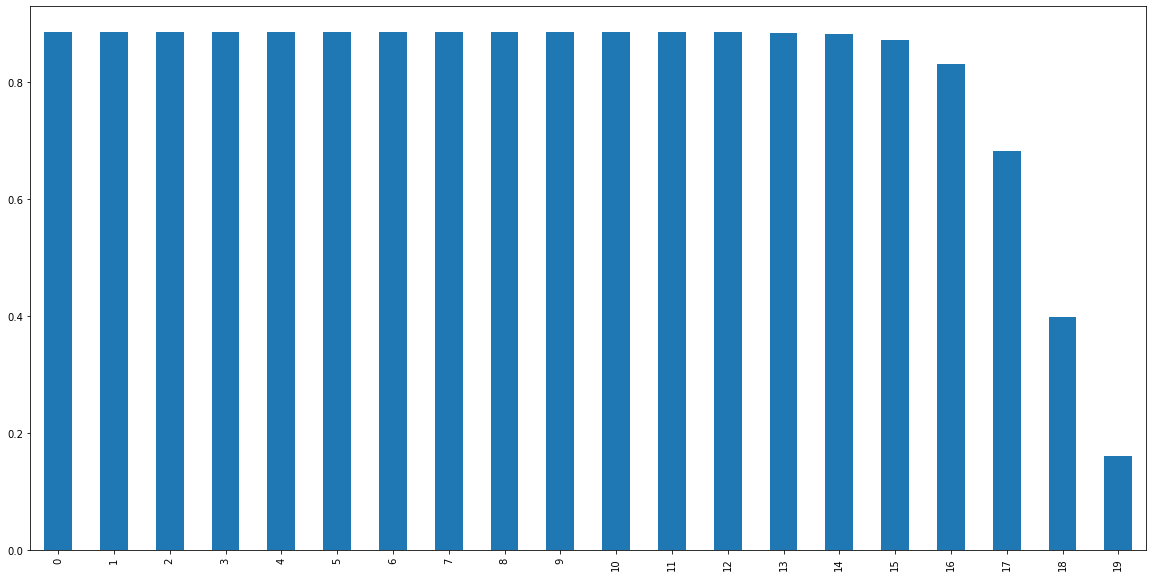

In [52]:
pd.DataFrame(ridge_gridsearch.cv_results_)['mean_test_score'].plot(figsize = (20, 10), kind = 'bar')